In [1]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
from tensorflow.keras.constraints import max_norm

import pandas as pd

In [2]:
import pandas as pd

#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g_onely_main.txt',delimiter='\t',engine='python')
first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_genec_only_main_14.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('Adera_Complete_data_base_10_july_v1_2_38pm.txt',delimiter=',',engine='python')

first_data_adera

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [5]:
first_data_adera1= first_data_adera.dropna(axis = 0, how ='any')
first_data_adera1
#first_data_adera2 = first_data_adera1.sort_values(by=['Freq'], ascending=[ False])
first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Cancer_type', 'Freq'], ascending=[True, True, False])
first_data_adera3
first_data_adera4 = first_data_adera3.drop_duplicates(subset=['Gene'], keep='first')
first_data_adera4

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
7,AADACL2,AMP,8.2,3,151733916.0,151761339.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12977,ZSWIM4,AMP,12.1,19,13795443.0,13832254.0,77,Serous_Ovarian_Cancer
12978,ZSWIM7,AMP,9.1,17,15976560.0,15999717.0,3,Sarcoma
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [6]:
first_data_adera["Cancer_type"].unique()

array(['Testicular_Germ_Cell_Tumors', 'Cervical_Squamous_Cell_Carcinoma',
       'Esophageal_Adenocarcinoma', 'Renal_Clear_Cell_Carcinoma',
       'Head_and_Neck_Squamous', 'Serous_Ovarian_Cancer',
       'Colorectal_Adenocarcinoma', 'Liver_Hepatocellular_Carcinoma',
       'Breast_Invasive_Ductal_Carcinoma', 'Stomach_Adenocarcinoma',
       'Uterine_Corpus_Endometrial_Carcinoma',
       'Diffuse_Large B-Cell_Lymphoma', 'Cholangiocarcinoma',
       'Uveal Melanoma', 'Bladder_Urothelial_Carcinoma', 'Sarcoma',
       'Prostate_Adenocarcinoma', 'Lung', 'Adrenocortical_Carcinoma',
       'Glioblastoma_Multiforme', 'Skin_Cutaneous_Melanoma',
       'Brain_Lower_Grade_Glioma'], dtype=object)

In [7]:
First_data_adera3a= first_data_adera3[first_data_adera3['Cancer_type'] == 'Testicular_Germ_Cell_Tumors']
First_data_adera3b= first_data_adera3[first_data_adera3['Cancer_type'] == 'Prostate_Adenocarcinoma']

First_data_adera3c = pd.concat([First_data_adera3a, First_data_adera3b])


In [8]:
First_data_adera3c['Cancer_type']

0        Testicular_Germ_Cell_Tumors
38       Testicular_Germ_Cell_Tumors
60       Testicular_Germ_Cell_Tumors
89       Testicular_Germ_Cell_Tumors
90       Testicular_Germ_Cell_Tumors
                    ...             
12594        Prostate_Adenocarcinoma
12624        Prostate_Adenocarcinoma
12657        Prostate_Adenocarcinoma
12761        Prostate_Adenocarcinoma
12980        Prostate_Adenocarcinoma
Name: Cancer_type, Length: 725, dtype: object

In [9]:
import tensorflow.keras
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(First_data_adera3c["CNA"])
Adera_CNA= encoder.transform(First_data_adera3c["CNA"])

Adera_CNA1= to_categorical(Adera_CNA,num_classes=4)
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
Adera_CNA1.shape #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(First_data_adera3c ['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states
Adera_chromosome=First_data_adera3c['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)

Adera_start=First_data_adera3c['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=First_data_adera3c['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=First_data_adera3c['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)

Adera_freq=First_data_adera3c['Freq']
Adera_freq1=np.array(Adera_freq)
Adera_freq2=Adera_freq1.reshape(Input_net_Adera1.shape[0],1)
#normalise chromsoem numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape
k1=First_data_adera3c["Cancer_type"].unique()
k1.shape[0]
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
Adera_CNA1
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape
Output_net_Adera=First_data_adera3c[["Cancer_type"]]
Output_net_Adera

from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(Output_net_Adera)
#Output_net_Adera1 = encoder.transform(Output_net_Adera)

#Output_net_Adera1 = np_utils.to_categorical(Output_net_Adera1,num_classes=3)
#Output_net_Adera1



encoder = LabelEncoder()
encoder.fit(First_data_adera3c[["Cancer_type"]])
Output_net_Adera1 = encoder.transform(First_data_adera3c[["Cancer_type"]])

Output_net_Adera2= to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])
Output_net_Adera2.shape
Output_net_Adera2
Input_Adera_numpy2=Input_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,8) #7 input values

Output_net_Adera3=Output_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,k1.shape[0]) #7 cancer types

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [10]:
import numpy as np
import tensorflow.keras.backend as K
from scipy.optimize import brentq
from scipy.interpolate import interp1d


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def fp(y_true, y_pred):
    return K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)

def fn(y_true, y_pred):
    return K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

def tp(y_true, y_pred):
    return K.sum(K.cast(y_true*y_pred, 'float'), axis=0)

def tn(y_true, y_pred):
    return K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)


def p(y_true, y_pred):
    p = tp(y_true, y_pred) / (tp(y_true, y_pred) + fp(y_true, y_pred) + K.epsilon())
    return K.mean(p)

def r(y_true, y_pred):
    r = tp(y_true, y_pred) / (tp(y_true, y_pred) + fn(y_true, y_pred) + K.epsilon())
    return K.mean(r)



def f1(y_true, y_pred):
    p = tp(y_true, y_pred) / (tp(y_true, y_pred) + fp(y_true, y_pred) + K.epsilon())
    r = tp(y_true, y_pred) / (tp(y_true, y_pred) + fn(y_true, y_pred) + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    return K.mean(f1)

def eer(y_true, y_pred):
    fpr = fp(y_true, y_pred)
    tpr = tp(y_true, y_pred)
    threshold = 0.5
    eer = brentq(lambda x: 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    return eer

In [19]:



from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import SpecificityAtSensitivity, AUC
#from tensorflow.keras import regularizers
from random import sample
es_ADERA = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=300)








class_0_indices = np.where(Output_net_Adera3 == 0)[0]
class_1_indices = np.where(Output_net_Adera3 == 1)[0]

num_samples_class_0 = len(class_0_indices)
num_samples_class_1 = len(class_1_indices)

target_size = min(num_samples_class_0, num_samples_class_1)

undersampled_indices = np.concatenate([
    sample(class_0_indices.tolist(), target_size),
    class_1_indices
])

Input_Adera_undersampled = Input_Adera_numpy2[undersampled_indices]
Output_net_Adera_undersampled = Output_net_Adera3[undersampled_indices]




grace_model = tf.keras.Sequential([


 #tf.keras.layers.Dense(2, activation='softmax'),
 #tf.keras.layers.Dense(1, activation='tanh')

#tf.keras.layers.Dense(2, activation='sigmoid'),
tf.keras.layers.Dense(2, activation='softplus'),



      ])





optimizer_Adera=tf.keras.optimizers.Adamax(learning_rate=2*1e-2, clipnorm = .08)

#grace_model.compile(optimizer=optimizer_Adera, loss='binary_crossentropy', metrics=['accuracy',p,r,f1])
grace_model.compile(optimizer=optimizer_Adera, loss='CategoricalFocalCrossentropy', metrics=[ 'accuracy', SpecificityAtSensitivity(0.5),AUC()  ])
k_adera = grace_model.fit(Input_Adera_undersampled, Output_net_Adera_undersampled, verbose=1, validation_split=0.49, epochs=200, batch_size=1, callbacks=[es_ADERA])

#k_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=200,batch_size=1, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=350,batch_size=250, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8

Epoch 1/200
739/739 [==============================] - 4s 4ms/step - loss: 0.0423 - accuracy: 0.7591 - specificity_at_sensitivity_2: 0.8782 - auc_2: 0.7912 - val_loss: 0.0364 - val_accuracy: 0.8298 - val_specificity_at_sensitivity_2: 0.9789 - val_auc_2: 0.8700
Epoch 2/200
739/739 [==============================] - 2s 3ms/step - loss: 0.0339 - accuracy: 0.8227 - specificity_at_sensitivity_2: 0.9662 - auc_2: 0.8974 - val_loss: 0.0281 - val_accuracy: 0.8298 - val_specificity_at_sensitivity_2: 0.9789 - val_auc_2: 0.9315
Epoch 3/200
739/739 [==============================] - 3s 4ms/step - loss: 0.0317 - accuracy: 0.8268 - specificity_at_sensitivity_2: 0.9770 - auc_2: 0.9185 - val_loss: 0.0329 - val_accuracy: 0.8298 - val_specificity_at_sensitivity_2: 0.9789 - val_auc_2: 0.9335
Epoch 4/200
739/739 [==============================] - 5s 7ms/step - loss: 0.0300 - accuracy: 0.8349 - specificity_at_sensitivity_2: 0.9797 - auc_2: 0.9294 - val_loss: 0.0301 - val_accuracy: 0.8298 - val_specificity_a

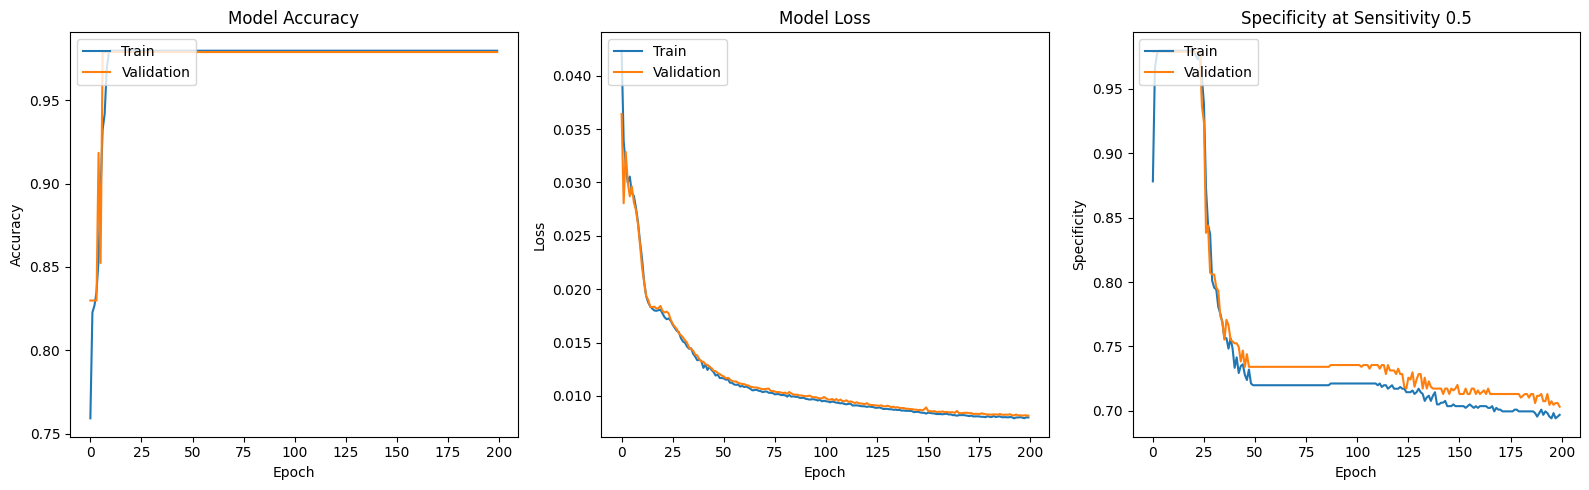

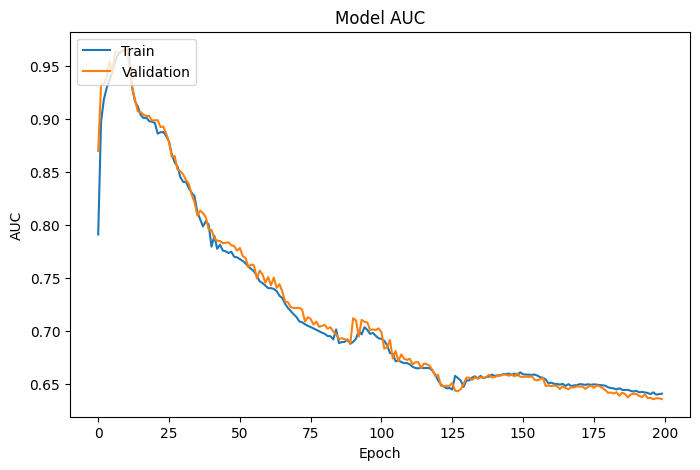

In [21]:
# Plotting multiple metrics
plt.figure(figsize=(16, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
plt.subplot(1, 3, 2)
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Specificity at Sensitivity 0.5
plt.subplot(1, 3, 3)
plt.plot(k_adera.history['specificity_at_sensitivity_2'])
plt.plot(k_adera.history['val_specificity_at_sensitivity_2'])
plt.title('Specificity at Sensitivity 0.5')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot AUC
plt.figure(figsize=(8, 5))
plt.plot(k_adera.history['auc_2'])
plt.plot(k_adera.history['val_auc_2'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

2/2 [==============================] - 1s 18ms/step - loss: 0.3305 - accuracy: 0.9793 - p: 0.7442 - r: 0.7365 - f1: 0.7403


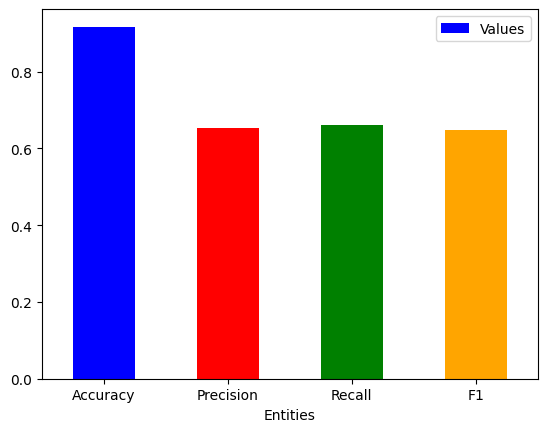

In [ ]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)
import matplotlib.pyplot as plot
#MODEL1
data_adera4 = pd.DataFrame({'Entities':['Accuracy', 'Precision', 'Recall', 'F1'],
        'Values':[0.9097, 0.6134, 0.6149 , 0.6060]})
#MODEL2
data_adera4 = pd.DataFrame({'Entities':['Accuracy', 'Precision', 'Recall', 'F1'],
        'Values':[0.9173, 0.6526, 0.6605 , 0.6493]})
adera_colours=['blue', 'red', 'green', 'orange']
#adera_results=pd.DataFrame(data_adera4)
ax = data_adera4.plot.bar(x='Entities', y='Values', rot=0,color=adera_colours)

2/2 [==============================] - 0s 7ms/step - loss: 0.2081 - accuracy: 0.9793


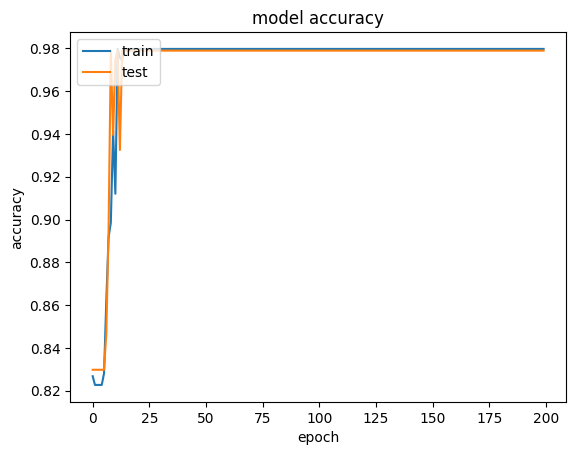

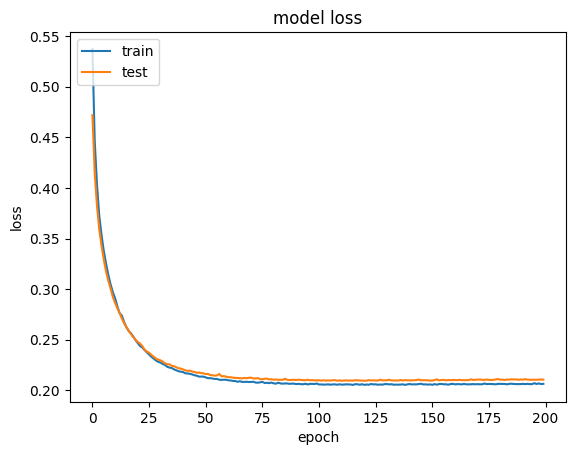

In [ ]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)
# summarize history for accuracy
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
axes = plt.gca()
#axes.set_ylim([-0.005,0.005])
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
#########################
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.title('model mape')
#plt.plot(k_adera.history['mean_squared_error'])
#plt.plot(k_adera.history['val_mape'])
#plt.plot(k_adera.history['mape'])
#plt.ylabel('mape')
#plt.xlabel('epoch')
#plt.show()
#plt.title('model mae')
#plt.plot(k_adera.history['val_mae'])
#plt.plot(k_adera.history['mae'])
#plt.show()


In [ ]:

grace_model.save("adera+90+80b+GODLY7+s27b_feb+MALE")
adera_47_40_model = tf.keras.saving.load_model("adera+90+80b+GODLY7+s27b_feb+MALE")

array(['Testicular_Germ_Cell_Tumors', 'Prostate_Adenocarcinoma'],
      dtype=object)

1/1 [==============================] - 0s 30ms/step
                             precision    recall  f1-score   support

    Prostate_Adenocarcinoma       0.05      0.03      0.04       179
Testicular_Germ_Cell_Tumors       0.01      0.02      0.01       118

                   accuracy                           0.03       297
                  macro avg       0.03      0.03      0.03       297
               weighted avg       0.03      0.03      0.03       297



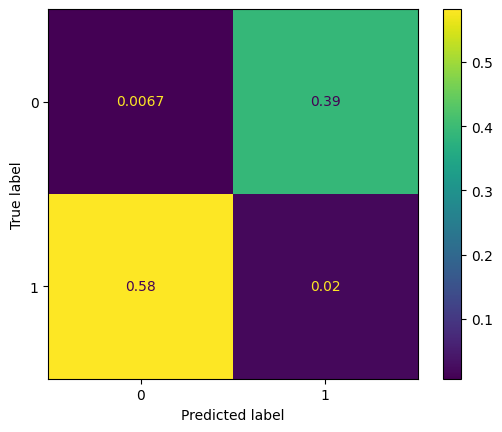

In [ ]:
First_data_adera3c["Cancer_type"].unique()
import random
First_data_adera3c["Cancer_type"].unique()
data_adera= {
    "types":First_data_adera3c["Cancer_type"].unique(),
    "values": [0, 1]
}

data_adera

threshold = 0.9 # Set the threshold for prediction
num_runs = 3

y_true_adera=[]
y_pred_adera=[]


for run in range(num_runs):
    adera_test = [random.randint(0, Adera_chromosome4.shape[0]-1) for _ in range(99)]

    for adera_test1 in adera_test:
        test_mac = Input_Adera_numpy2[adera_test1].reshape(1, 1, 1, 8)
        adera_result = adera_47_40_model.predict(test_mac)
        #print("adera_result=",adera_result)


        adera_result_thresholded = (adera_result >= threshold).astype(int)
        adera_result5 = np.argmax(adera_result_thresholded)
       # print("adera_result5=",adera_result5)
        y_true_adera.append(First_data_adera3c['Cancer_type'].iloc[adera_test1])
        y_pred_adera.append(data_adera['types'][adera_result5])


#print(y_true_adera)
#print(y_pred_adera)


from sklearn.metrics import confusion_matrix

#print(y_true_adera)
#print(y_pred_adera)

##y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
 ##y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
from sklearn.metrics import multilabel_confusion_matrix
#multilabel_confusion_matrix


#array([[2, 0, 0],
 #      [0, 0, 1],
   #3    [1, 0, 2]])

mkr1=confusion_matrix(y_true_adera, y_pred_adera, labels=[First_data_adera3c["Cancer_type"].unique()[0],
                                                          First_data_adera3c["Cancer_type"].unique()[1]]
                                                      ,normalize='all')
mkr1
from sklearn.metrics import classification_report

print(classification_report(y_true_adera, y_pred_adera))


#mkr2=np.array([[2, 0, 0],
 #      [0, 0, 1],
  #     [1, 0, 2]])
#print(mkr2)
#from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

mkr1_display = ConfusionMatrixDisplay(mkr1).plot()